In [548]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


In [549]:
df = pd.read_csv('dataset/hcho.csv')
df

,HCHO,Location,Current date,Next date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02
2,0.000176,Nuwara Eliya Proper,2019-01-01,2019-01-02
3,0.000176,Kandy Proper,2019-01-01,2019-01-02
4,0.000176,"Bibile, Monaragala",2019-01-01,2019-01-02
...,...,...,...,...
12649,0.000080,Nuwara Eliya Proper,2023-12-31,2024-01-01
12650,0.000080,Kandy Proper,2023-12-31,2024-01-01
12651,0.000065,"Bibile, Monaragala",2023-12-31,2024-01-01
12652,0.000065,Kurunegala Proper,2023-12-31,2024-01-01


In [550]:
df = df.drop(columns=['Next date'])

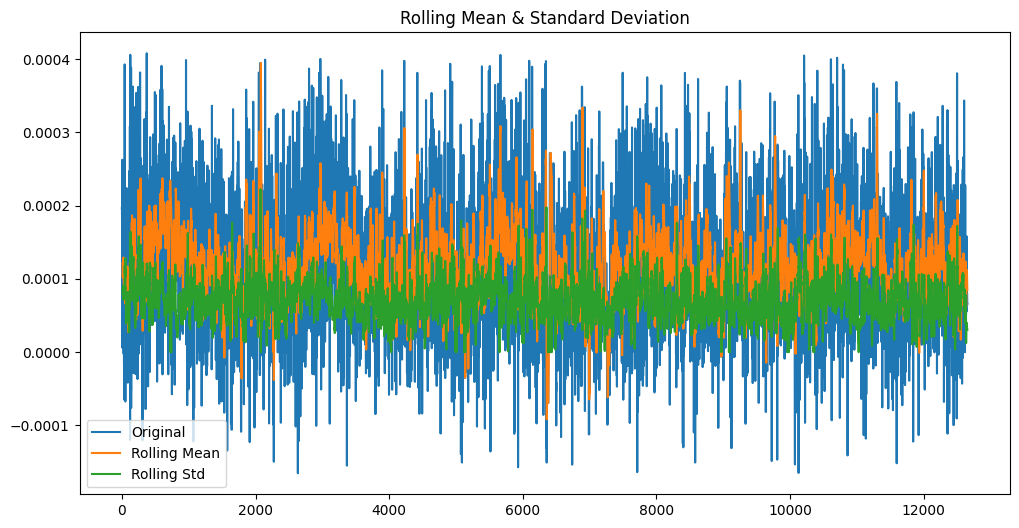

In [551]:
# Rolling Statistics Plot
rolling_mean = df['HCHO'].rolling(window=12).mean()
rolling_std = df['HCHO'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(df['HCHO'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()


In [552]:
# Convert 'Current date' to datetime
df['Current date'] = pd.to_datetime(df['Current date'])

# Get unique locations
unique_locations = df['Location'].unique()

# Create separate DataFrame for each location with dynamic variable naming
for location in unique_locations:
    globals()[location.replace(" ", "_").replace(",", "").replace(" ", "_") + "_df"] = df.loc[df['Location'] == location].drop(columns='Location').set_index('Current date')

# Access DataFrame for 'Colombo Proper'
print(Colombo_Proper_df.head())
print(Deniyaya_Matara_df.head())
print(Nuwara_Eliya_Proper_df.head())
print(Kandy_Proper_df.head())
print(Bibile_Monaragala_df.head())
print(Kurunegala_Proper_df.head())
print(Jaffna_Proper_df.head())

                  HCHO
Current date          
2019-01-01    0.000197
2019-01-02    0.000263
2019-01-03    0.000099
2019-01-04    0.000210
2019-01-05    0.000179
                  HCHO
Current date          
2019-01-01    0.000197
2019-01-02    0.000006
2019-01-03    0.000236
2019-01-04    0.000064
2019-01-05    0.000053
                  HCHO
Current date          
2019-01-01    0.000176
2019-01-02    0.000006
2019-01-03    0.000191
2019-01-04    0.000051
2019-01-05    0.000065
                  HCHO
Current date          
2019-01-01    0.000176
2019-01-02    0.000092
2019-01-03    0.000191
2019-01-04    0.000191
2019-01-05    0.000122
                  HCHO
Current date          
2019-01-01    0.000176
2019-01-02    0.000019
2019-01-03    0.000028
2019-01-04    0.000037
2019-01-05   -0.000018
                  HCHO
Current date          
2019-01-01    0.000088
2019-01-02    0.000137
2019-01-03    0.000148
2019-01-04   -0.000002
2019-01-05    0.000249
                  HCHO
Current dat

In [553]:
Colombo_Proper_df

,HCHO
Current date,
2019-01-01,0.000197
2019-01-02,0.000263
2019-01-03,0.000099
2019-01-04,0.000210
2019-01-05,0.000179
...,...
2023-12-27,0.000118
2023-12-28,0.000075
2023-12-29,0.000051


In [554]:
Colombo_Proper_df.to_csv('dataset/cmb.csv')

<Axes: xlabel='Current date'>

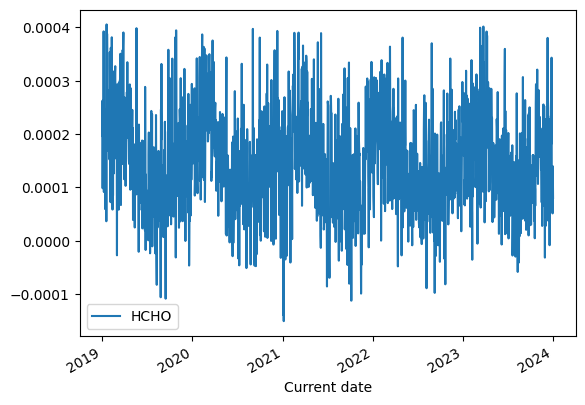

In [555]:
Colombo_Proper_df.plot()

In [556]:
# Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

Colombo

In [557]:
test_result=adfuller(Colombo_Proper_df['HCHO'])

In [558]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(hcho):
    result=adfuller(hcho)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [559]:
adfuller_test(Colombo_Proper_df['HCHO'])

ADF Test Statistic : -4.960174834388454
p-value : 2.659384346593318e-05
#Lags Used : 15
Number of Observations Used : 1789
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


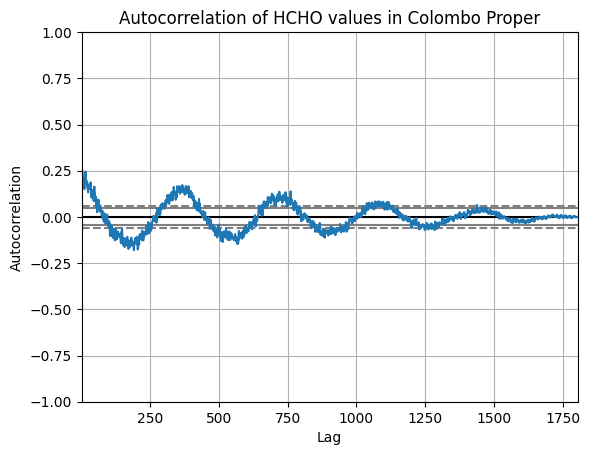

In [560]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

autocorrelation_plot(Colombo_Proper_df['HCHO'])
plt.title('Autocorrelation of HCHO values in Colombo Proper')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


In [561]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

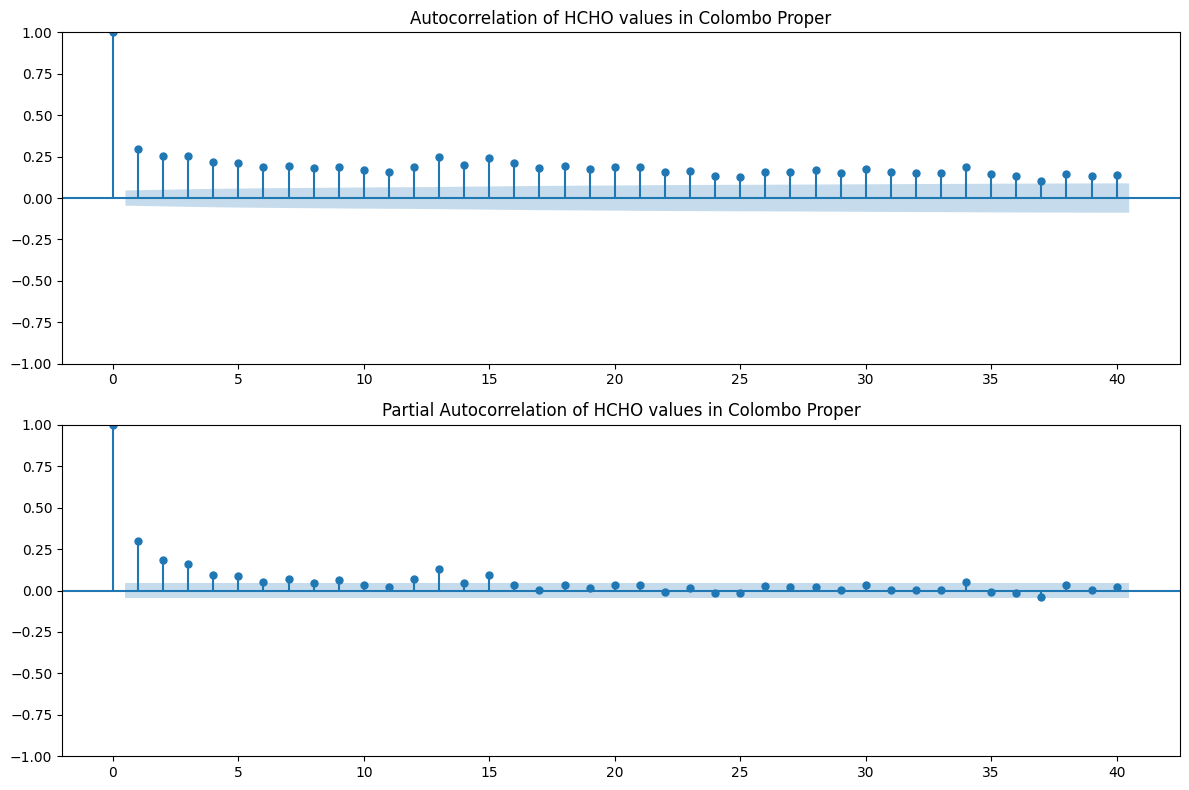

In [562]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Colombo_Proper_df['HCHO'].iloc[13:], lags=40, ax=ax1)
ax1.set_title('Autocorrelation of HCHO values in Colombo Proper')

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Colombo_Proper_df['HCHO'].iloc[13:], lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation of HCHO values in Colombo Proper')

plt.tight_layout()
plt.show()


SARIMAX Forecsting

In [563]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt

Colombo

ADF Statistic: -4.960174834388454
p-Value: 2.659384346593318e-05
Time series is likely stationary.


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

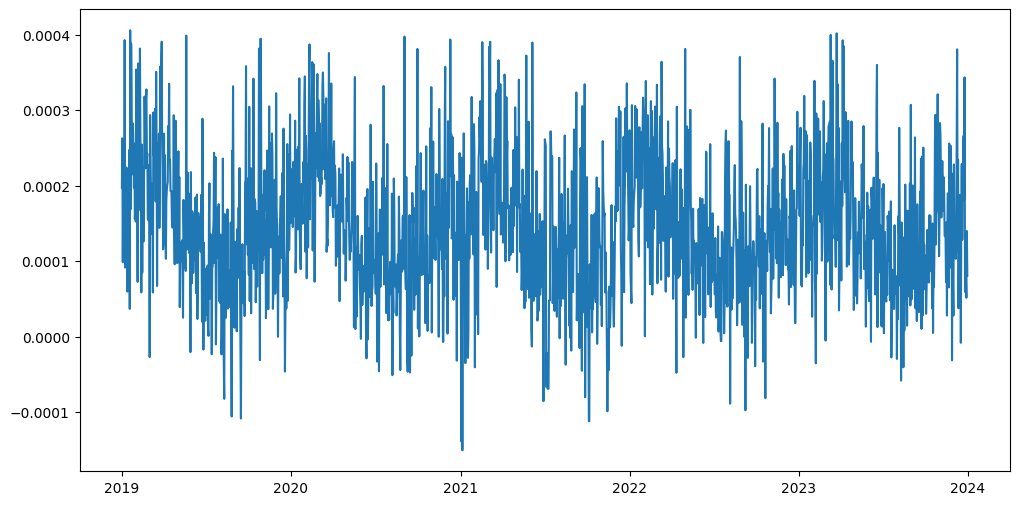

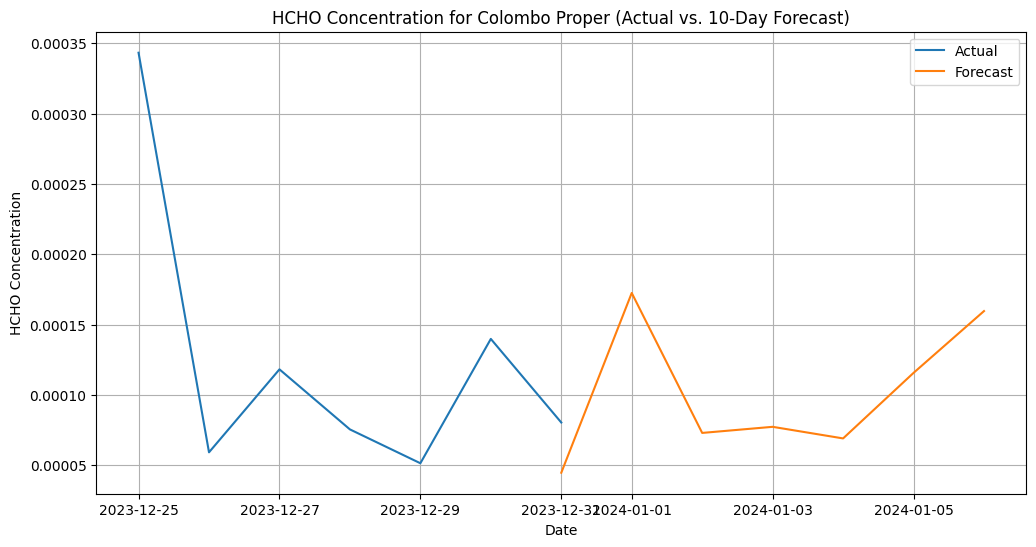

Mean Squared Error (MSE): 1.589824683563352e-08
Root Mean Squared Error (RMSE): 0.00012608825018864175
Mean Absolute Error (MAE): 8.28775692953215e-05


In [564]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
  # Perform Dickey-Fuller test
  dftest = adfuller(timeseries)
  dfvalue = dftest[0]
  pvalue = dftest[1]
  # Print test results
  print("ADF Statistic:", dfvalue)
  print("p-Value:", pvalue)
  # Interpret test results (conventionally, p-Value < 0.05 indicates stationarity)
  if pvalue < 0.05:
    print("Time series is likely stationary.")
  else:
    print("Time series is likely non-stationary.")

test_stationarity(Colombo_Proper_df['HCHO'])

# Daily Colombo_Proper_df might not have seasonality, but inspect your Colombo_Proper_df for patterns
# Seasonality could be weekly, monthly, quarterly, or yearly depending on the Colombo_Proper_df

# Use all Colombo_Proper_df up to the forecast start date for training (2023-12-30)
train = Colombo_Proper_df.loc[:pd.to_datetime('2023-12-30')]  

# Define forecast horizon
future_steps = 7  # Forecast for 7 days

# Set the forecast start date (2023-12-30)
start_date = pd.to_datetime('2023-12-30')

# Filter Colombo_Proper_df for plotting actual values (2023-12-25 to 2023-12-31)
plot_actual_dates = pd.date_range(start=pd.to_datetime('2023-12-25'), end=('2023-12-31'))  # Include the last day (2023-12-31) for actual Colombo_Proper_df

# Generate forecast for the next 10 days
future_forecast = train  # Use all Colombo_Proper_df up to forecast start date for training
model = SARIMAX(future_forecast['HCHO'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7),  # Adjust seasonality if needed
                 initialization='diffuse')
model_fit = model.fit()
forecast = model_fit.forecast(steps=future_steps)

# Prepare forecast dates
forecast_dates = pd.date_range(start=start_date+pd.Timedelta(days=1), periods=future_steps)  # Start forecast from next day


# View Colombo_Proper_df to identify potential seasonality (e.g., daily plots)
plt.figure(figsize=(12, 6))
plt.plot(Colombo_Proper_df['HCHO'])
plt.show()



# Plot actual Colombo_Proper_df and forecast
plt.figure(figsize=(12, 6))
plt.plot(plot_actual_dates, Colombo_Proper_df.loc[plot_actual_dates, 'HCHO'], label='Actual')
plt.plot(forecast_dates, forecast, label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('HCHO Concentration')
plt.title('HCHO Concentration for Colombo Proper (Actual vs. 10-Day Forecast)')
plt.grid(True)
plt.show()


# Calculate errors, MSE, RMSE, MAE
actual_values = Colombo_Proper_df.loc[plot_actual_dates, 'HCHO'].values
forecast_values = forecast.values
errors = actual_values - forecast_values
mse = np.mean(errors**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(errors))
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Deniyaya, Matara

In [565]:
test_result=adfuller(Deniyaya_Matara_df['HCHO'])

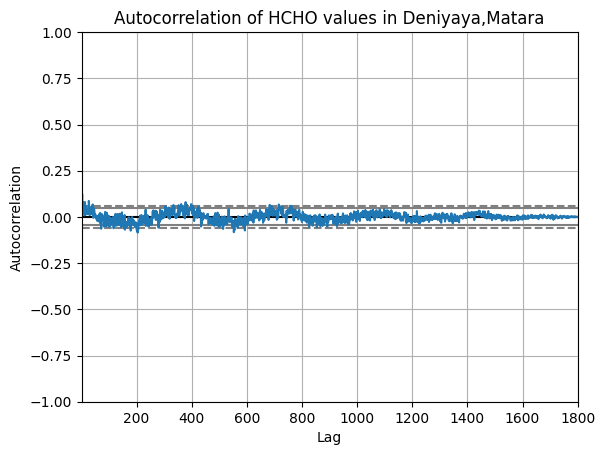

In [566]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

autocorrelation_plot(Deniyaya_Matara_df['HCHO'])
plt.title('Autocorrelation of HCHO values in Deniyaya,Matara')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

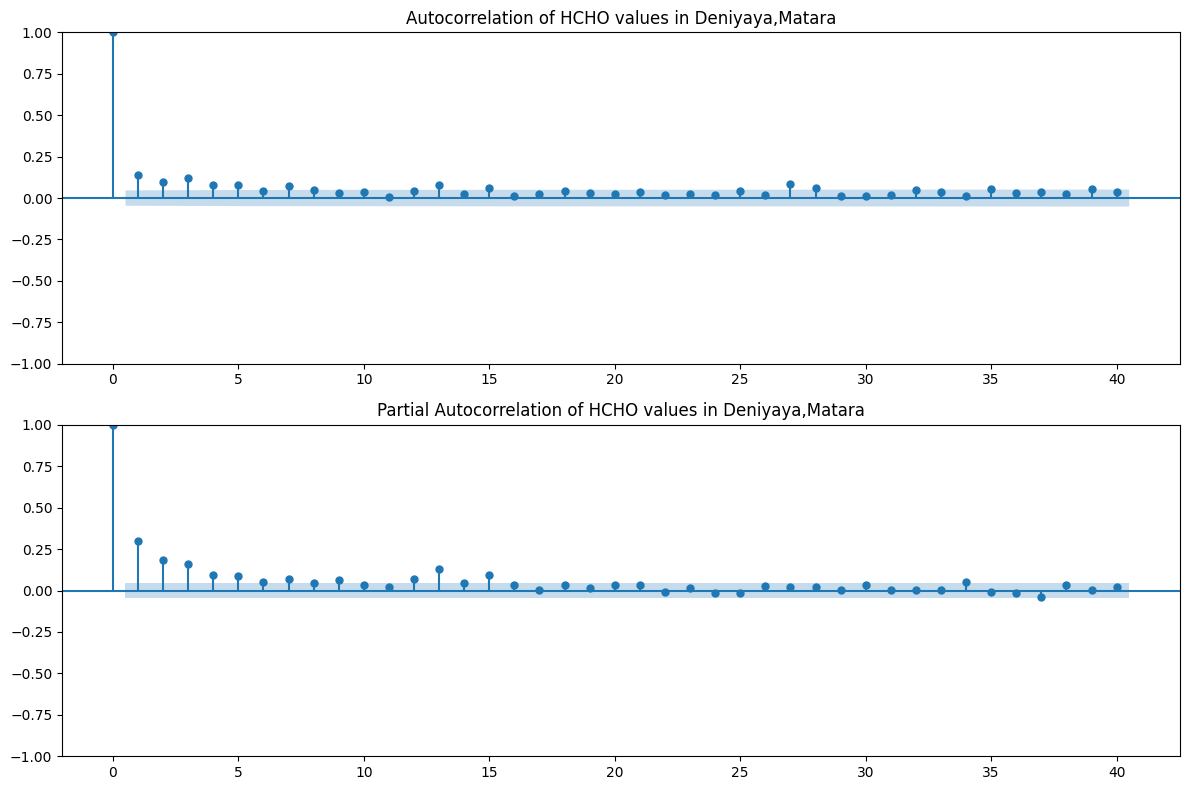

In [567]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Deniyaya_Matara_df['HCHO'].iloc[13:], lags=40, ax=ax1)
ax1.set_title('Autocorrelation of HCHO values in Deniyaya,Matara')

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Colombo_Proper_df['HCHO'].iloc[13:], lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation of HCHO values in Deniyaya,Matara')

plt.tight_layout()
plt.show()

ADF Statistic: -15.078887078906144
p-Value: 8.511267690750755e-28
Time series is likely stationary.


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  r

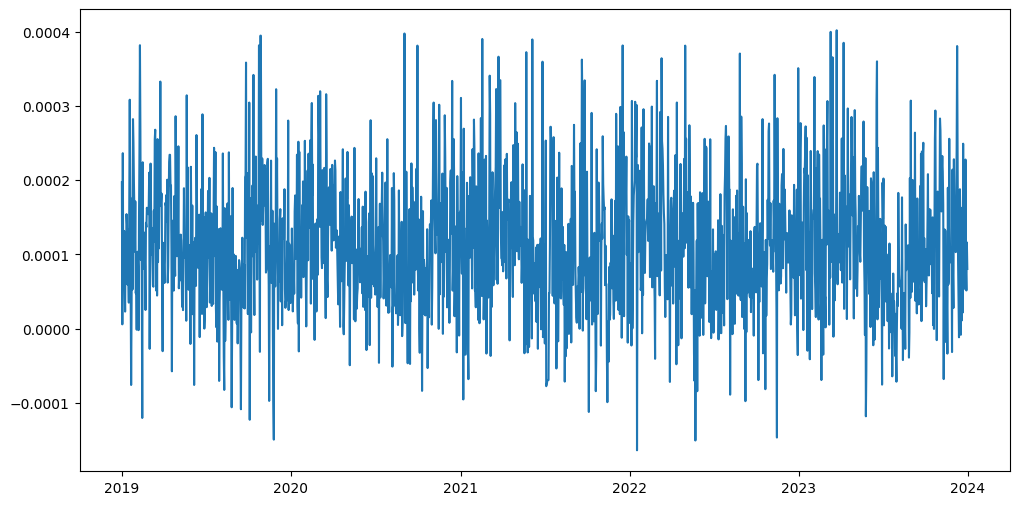

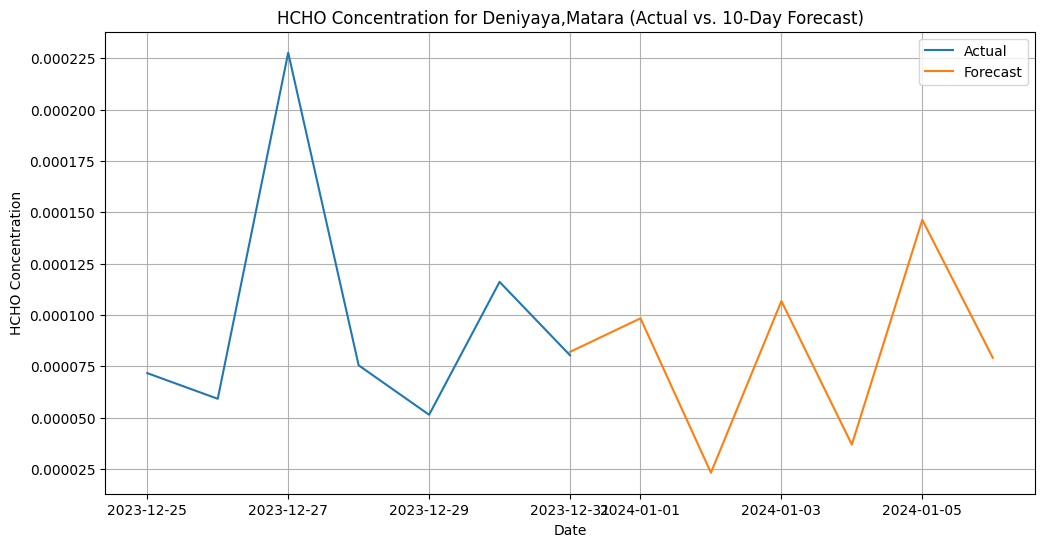

Mean Squared Error (MSE): 6.512161144874062e-09
Root Mean Squared Error (RMSE): 8.069796245800796e-05
Mean Absolute Error (MAE): 4.733105291388714e-05


In [568]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
  # Perform Dickey-Fuller test
  dftest = adfuller(timeseries)
  dfvalue = dftest[0]
  pvalue = dftest[1]
  # Print test results
  print("ADF Statistic:", dfvalue)
  print("p-Value:", pvalue)
  # Interpret test results (conventionally, p-Value < 0.05 indicates stationarity)
  if pvalue < 0.05:
    print("Time series is likely stationary.")
  else:
    print("Time series is likely non-stationary.")

test_stationarity(Deniyaya_Matara_df['HCHO'])

# Daily Deniyaya_Matara_df might not have seasonality, but inspect your Deniyaya_Matara_df for patterns
# Seasonality could be weekly, monthly, quarterly, or yearly depending on the Deniyaya_Matara_df

# Use all Deniyaya_Matara_df up to the forecast start date for training (2023-12-30)
train = Deniyaya_Matara_df.loc[:pd.to_datetime('2023-12-30')]  

# Define forecast horizon
future_steps = 7  # Forecast for 7 days

# Set the forecast start date (2023-12-30)
start_date = pd.to_datetime('2023-12-30')

# Filter Deniyaya_Matara_df for plotting actual values (2023-12-25 to 2023-12-31)
plot_actual_dates = pd.date_range(start=pd.to_datetime('2023-12-25'), end=('2023-12-31'))  # Include the last day (2023-12-31) for actual Deniyaya_Matara_df

# Generate forecast for the next 10 days
future_forecast = train  # Use all Deniyaya_Matara_df up to forecast start date for training
model = SARIMAX(future_forecast['HCHO'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7),  # Adjust seasonality if needed
                 initialization='diffuse')
model_fit = model.fit()
forecast = model_fit.forecast(steps=future_steps)

# Prepare forecast dates
forecast_dates = pd.date_range(start=start_date+pd.Timedelta(days=1), periods=future_steps)  # Start forecast from next day


# View Deniyaya_Matara_df to identify potential seasonality (e.g., daily plots)
plt.figure(figsize=(12, 6))
plt.plot(Deniyaya_Matara_df['HCHO'])
plt.show()



# Plot actual Deniyaya_Matara_df and forecast
plt.figure(figsize=(12, 6))
plt.plot(plot_actual_dates, Deniyaya_Matara_df.loc[plot_actual_dates, 'HCHO'], label='Actual')
plt.plot(forecast_dates, forecast, label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('HCHO Concentration')
plt.title('HCHO Concentration for Deniyaya,Matara (Actual vs. 10-Day Forecast)')
plt.grid(True)
plt.show()


# Calculate errors, MSE, RMSE, MAE
actual_values = Deniyaya_Matara_df.loc[plot_actual_dates, 'HCHO'].values
forecast_values = forecast.values
errors = actual_values - forecast_values
mse = np.mean(errors**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(errors))
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Nuwara_Eliya

In [569]:
Nuwara_Eliya_Proper_df

,HCHO
Current date,
2019-01-01,0.000176
2019-01-02,0.000006
2019-01-03,0.000191
2019-01-04,0.000051
2019-01-05,0.000065
...,...
2023-12-27,0.000228
2023-12-28,0.000075
2023-12-29,0.000051


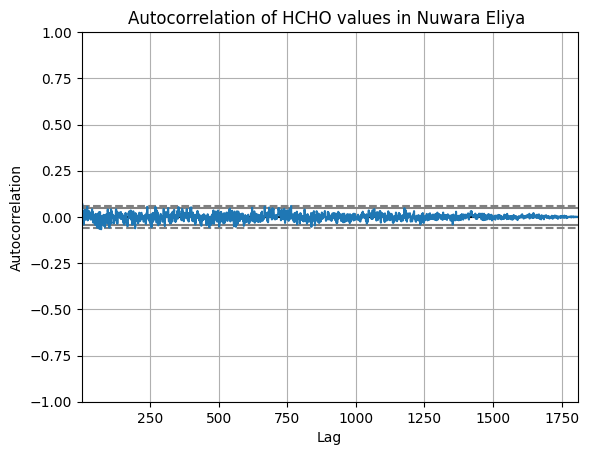

In [570]:
autocorrelation_plot(Nuwara_Eliya_Proper_df['HCHO'])
plt.title('Autocorrelation of HCHO values in Nuwara Eliya ')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


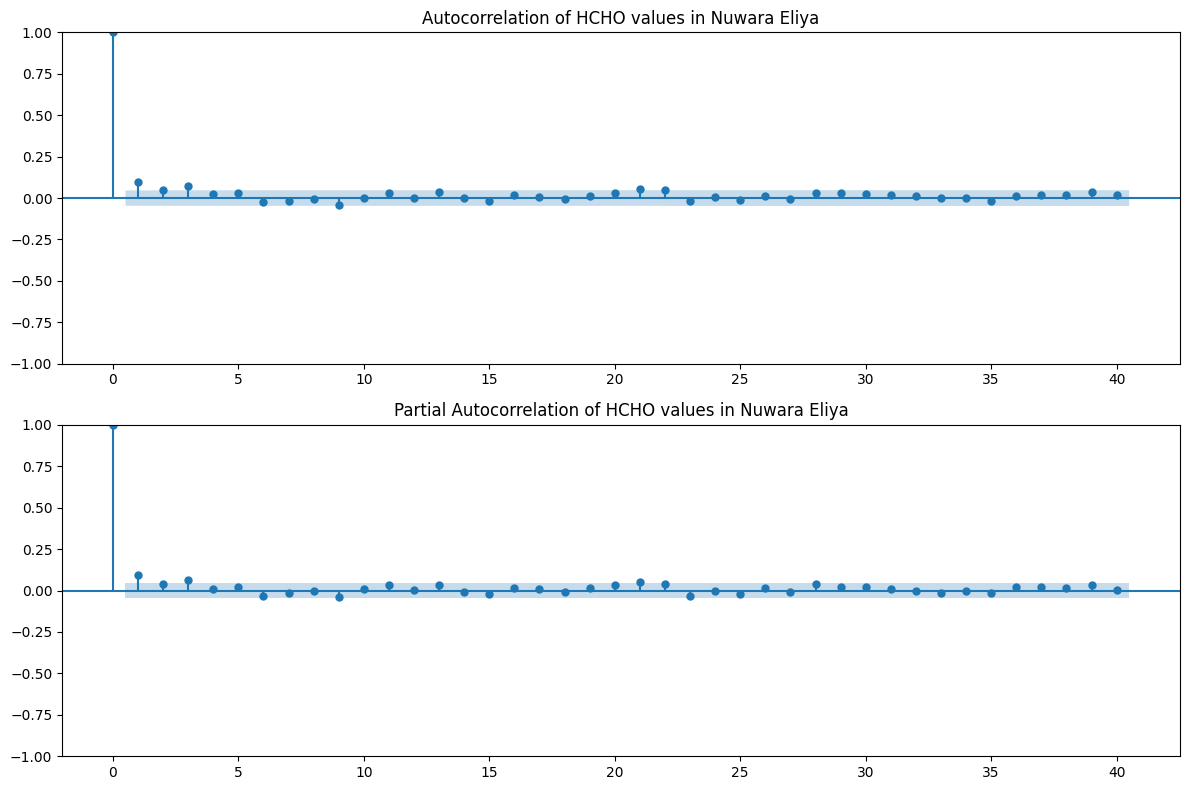

In [571]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Nuwara_Eliya_Proper_df['HCHO'].iloc[13:], lags=40, ax=ax1)
ax1.set_title('Autocorrelation of HCHO values in Nuwara Eliya')

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Nuwara_Eliya_Proper_df['HCHO'].iloc[13:], lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation of HCHO values in Nuwara Eliya')

plt.tight_layout()
plt.show()

ADF Statistic: -21.59928211831987
p-Value: 0.0
Time series is likely stationary.


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

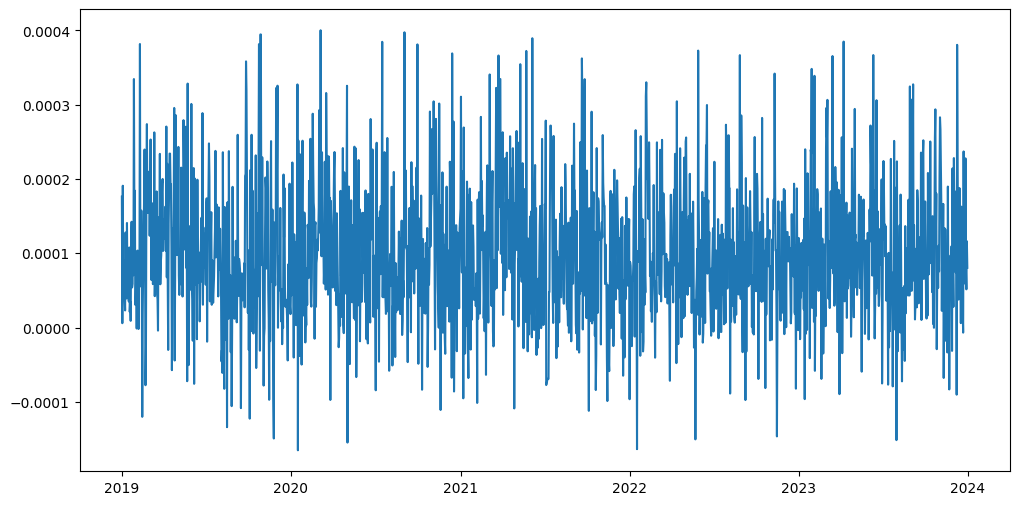

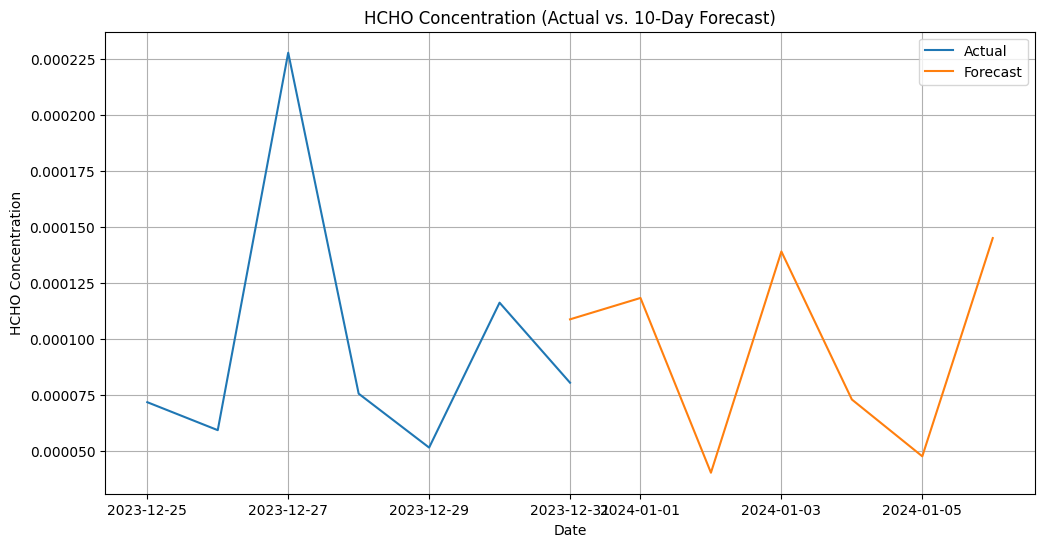

Mean Squared Error (MSE): 7.627216267953546e-09
Root Mean Squared Error (RMSE): 8.733393537424926e-05
Mean Absolute Error (MAE): 7.167263117358492e-05


In [572]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
  # Perform Dickey-Fuller test
  dftest = adfuller(timeseries)
  dfvalue = dftest[0]
  pvalue = dftest[1]
  # Print test results
  print("ADF Statistic:", dfvalue)
  print("p-Value:", pvalue)
  # Interpret test results (conventionally, p-Value < 0.05 indicates stationarity)
  if pvalue < 0.05:
    print("Time series is likely stationary.")
  else:
    print("Time series is likely non-stationary.")

test_stationarity(Nuwara_Eliya_Proper_df['HCHO'])

# Daily Nuwara_Eliya_Proper_df might not have seasonality, but inspect your Nuwara_Eliya_Proper_df for patterns
# Seasonality could be weekly, monthly, quarterly, or yearly depending on the Nuwara_Eliya_Proper_df

# Use all Nuwara_Eliya_Proper_df up to the forecast start date for training (2023-12-30)
train = Nuwara_Eliya_Proper_df.loc[:pd.to_datetime('2023-12-30')]  

# Define forecast horizon
future_steps = 7  # Forecast for 7 days

# Set the forecast start date (2023-12-30)
start_date = pd.to_datetime('2023-12-30')

# Filter Nuwara_Eliya_Proper_df for plotting actual values (2023-12-25 to 2023-12-31)
plot_actual_dates = pd.date_range(start=pd.to_datetime('2023-12-25'), end=('2023-12-31'))  # Include the last day (2023-12-31) for actual Nuwara_Eliya_Proper_df

# Generate forecast for the next 10 days
future_forecast = train  # Use all Nuwara_Eliya_Proper_df up to forecast start date for training
model = SARIMAX(future_forecast['HCHO'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7),  # Adjust seasonality if needed
                 initialization='diffuse')
model_fit = model.fit()
forecast = model_fit.forecast(steps=future_steps)

# Prepare forecast dates
forecast_dates = pd.date_range(start=start_date+pd.Timedelta(days=1), periods=future_steps)  # Start forecast from next day


# View Nuwara_Eliya_Proper_df to identify potential seasonality (e.g., daily plots)
plt.figure(figsize=(12, 6))
plt.plot(Nuwara_Eliya_Proper_df['HCHO'])
plt.show()



# Plot actual Nuwara_Eliya_Proper_df and forecast
plt.figure(figsize=(12, 6))
plt.plot(plot_actual_dates, Nuwara_Eliya_Proper_df.loc[plot_actual_dates, 'HCHO'], label='Actual')
plt.plot(forecast_dates, forecast, label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('HCHO Concentration')
plt.title('HCHO Concentration (Actual vs. 10-Day Forecast)')
plt.grid(True)
plt.show()


# Calculate errors, MSE, RMSE, MAE
actual_values = Nuwara_Eliya_Proper_df.loc[plot_actual_dates, 'HCHO'].values
forecast_values = forecast.values
errors = actual_values - forecast_values
mse = np.mean(errors**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(errors))
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Kandy

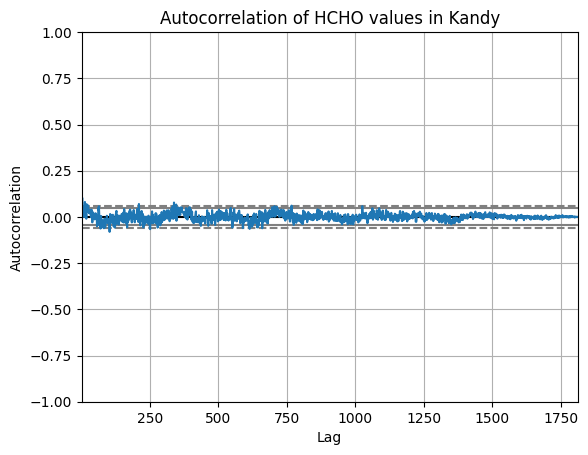

In [573]:
autocorrelation_plot(Kandy_Proper_df['HCHO'])
plt.title('Autocorrelation of HCHO values in Kandy')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


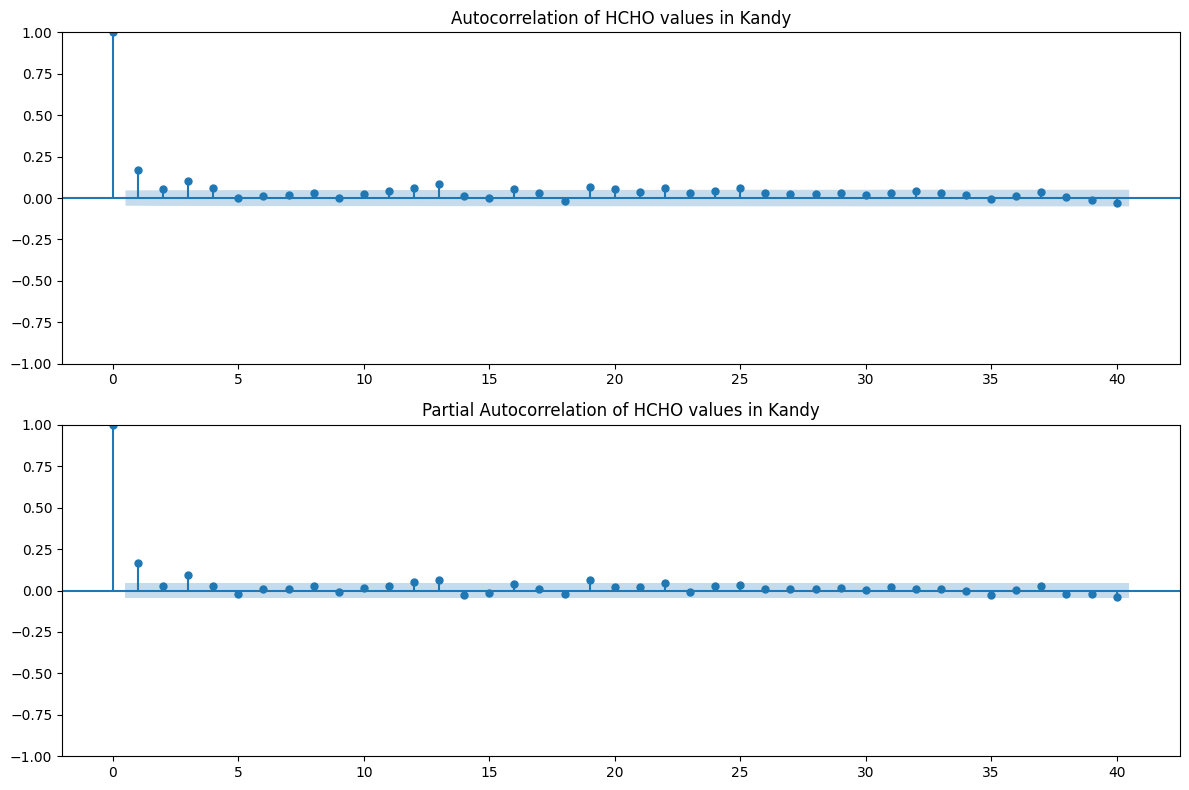

In [574]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Kandy_Proper_df['HCHO'].iloc[13:], lags=40, ax=ax1)
ax1.set_title('Autocorrelation of HCHO values in Kandy')

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Kandy_Proper_df['HCHO'].iloc[13:], lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation of HCHO values in Kandy')

plt.tight_layout()
plt.show()

ADF Statistic: -6.617754595124601
p-Value: 6.145878281273449e-09
Time series is likely stationary.


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

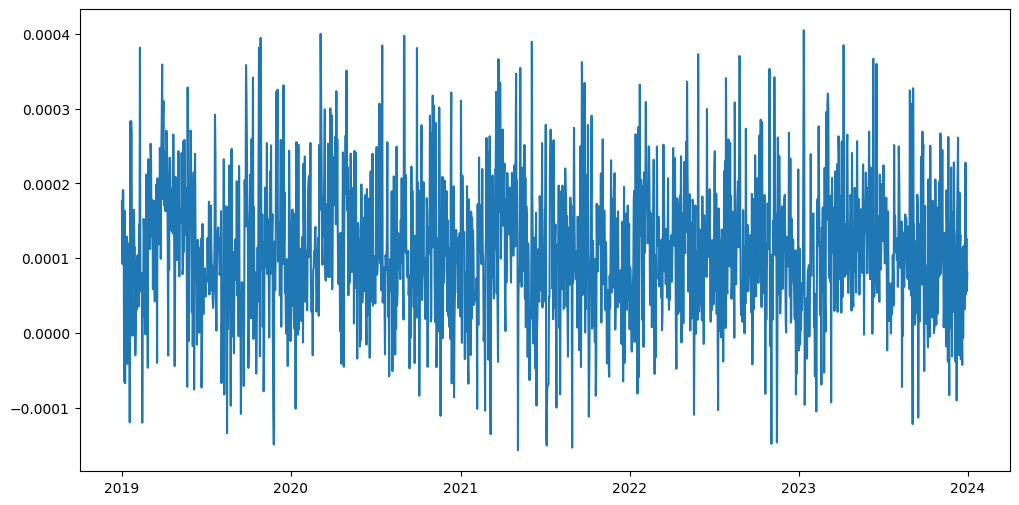

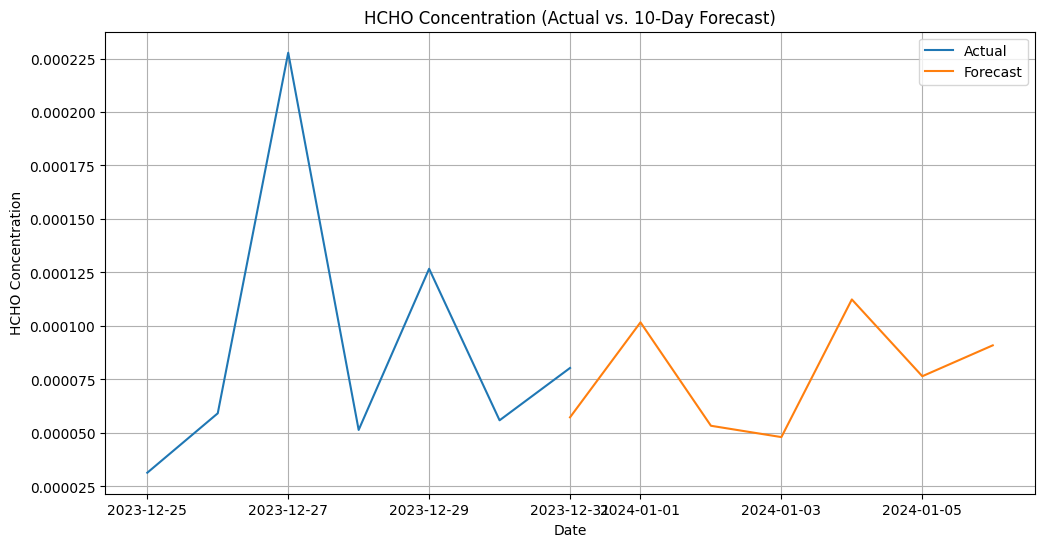

Mean Squared Error (MSE): 4.8045637634649616e-09
Root Mean Squared Error (RMSE): 6.931496060350148e-05
Mean Absolute Error (MAE): 4.166041235792331e-05


In [575]:
from statsmodels.tsa.stattools import adfuller


# dataframe of the Kandy_proper
Kandy_Proper_df

def test_stationarity(timeseries):
  # Perform Dickey-Fuller test
  dftest = adfuller(timeseries)
  dfvalue = dftest[0]
  pvalue = dftest[1]
  # Print test results
  print("ADF Statistic:", dfvalue)
  print("p-Value:", pvalue)
  # Interpret test results (conventionally, p-Value < 0.05 indicates stationarity)
  if pvalue < 0.05:
    print("Time series is likely stationary.")
  else:
    print("Time series is likely non-stationary.")

test_stationarity(Kandy_Proper_df['HCHO'])

# Daily Kandy_Proper_df might not have seasonality, but inspect your Kandy_Proper_df for patterns
# Seasonality could be weekly, monthly, quarterly, or yearly depending on the Kandy_Proper_df

# Use all Kandy_Proper_df up to the forecast start date for training (2023-12-30)
train = Kandy_Proper_df.loc[:pd.to_datetime('2023-12-30')]  

# Define forecast horizon
future_steps = 7  # Forecast for 7 days

# Set the forecast start date (2023-12-30)
start_date = pd.to_datetime('2023-12-30')

# Filter Kandy_Proper_df for plotting actual values (2023-12-25 to 2023-12-31)
plot_actual_dates = pd.date_range(start=pd.to_datetime('2023-12-25'), end=('2023-12-31'))  # Include the last day (2023-12-31) for actual Kandy_Proper_df

# Generate forecast for the next 10 days
future_forecast = train  # Use all Kandy_Proper_df up to forecast start date for training
model = SARIMAX(future_forecast['HCHO'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7),  # Adjust seasonality if needed
                 initialization='diffuse')
model_fit = model.fit()
forecast = model_fit.forecast(steps=future_steps)

# Prepare forecast dates
forecast_dates = pd.date_range(start=start_date+pd.Timedelta(days=1), periods=future_steps)  # Start forecast from next day


# View Kandy_Proper_df to identify potential seasonality (e.g., daily plots)
plt.figure(figsize=(12, 6))
plt.plot(Kandy_Proper_df['HCHO'])
plt.show()



# Plot actual Kandy_Proper_df and forecast
plt.figure(figsize=(12, 6))
plt.plot(plot_actual_dates, Kandy_Proper_df.loc[plot_actual_dates, 'HCHO'], label='Actual')
plt.plot(forecast_dates, forecast, label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('HCHO Concentration')
plt.title('HCHO Concentration (Actual vs. 10-Day Forecast)')
plt.grid(True)
plt.show()


# Calculate errors, MSE, RMSE, MAE
actual_values = Kandy_Proper_df.loc[plot_actual_dates, 'HCHO'].values
forecast_values = forecast.values
errors = actual_values - forecast_values
mse = np.mean(errors**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(errors))
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Bibile,Monaragala

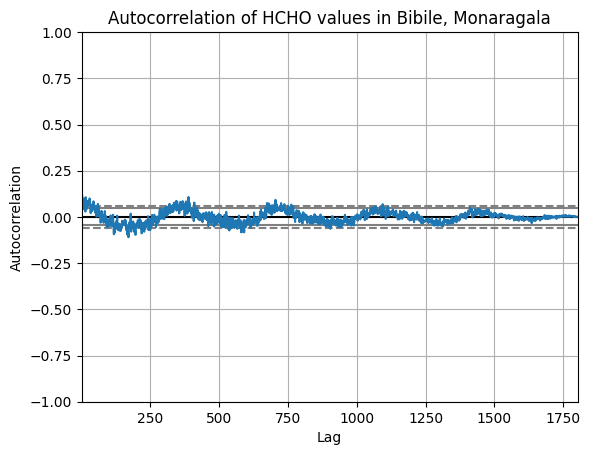

In [576]:
autocorrelation_plot(Bibile_Monaragala_df['HCHO'])
plt.title('Autocorrelation of HCHO values in Bibile, Monaragala')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


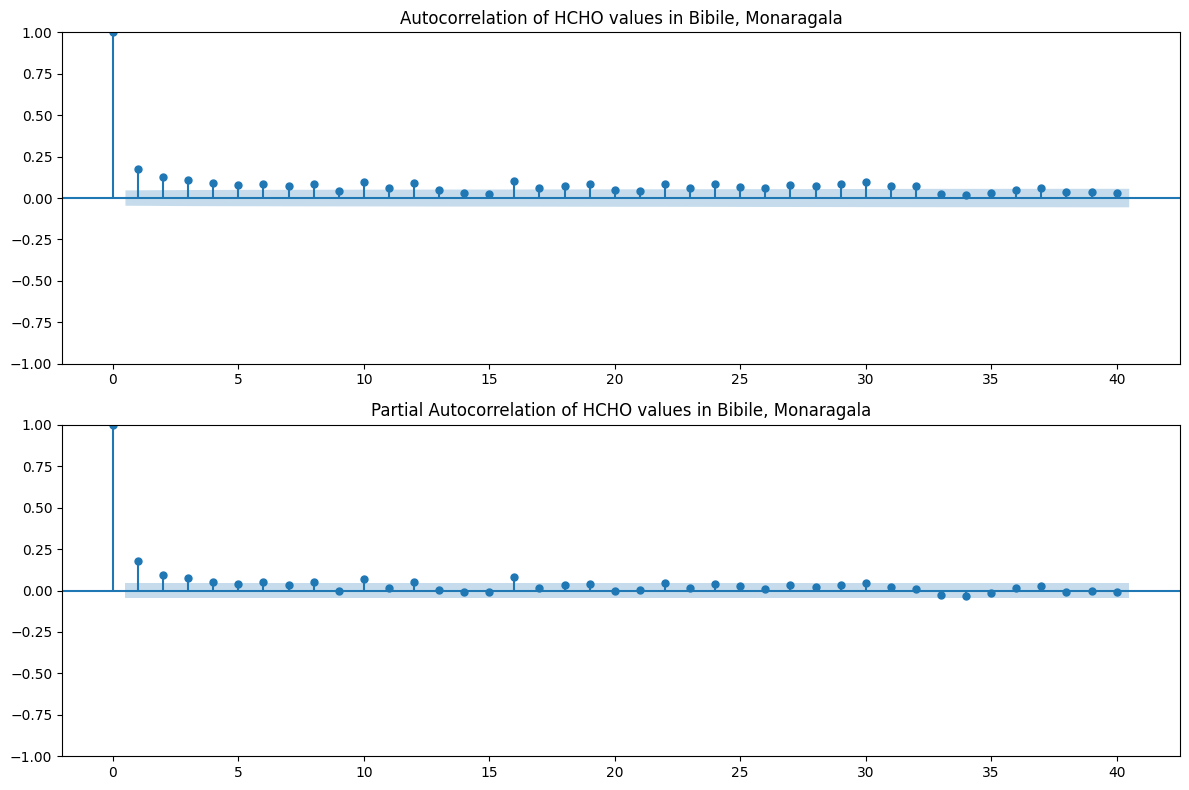

In [577]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Bibile_Monaragala_df['HCHO'].iloc[13:], lags=40, ax=ax1)
ax1.set_title('Autocorrelation of HCHO values in Bibile, Monaragala')

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Bibile_Monaragala_df['HCHO'].iloc[13:], lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation of HCHO values in Bibile, Monaragala')

plt.tight_layout()
plt.show()

ADF Statistic: -7.571269534792771
p-Value: 2.8371169565952207e-11
Time series is likely stationary.


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  r

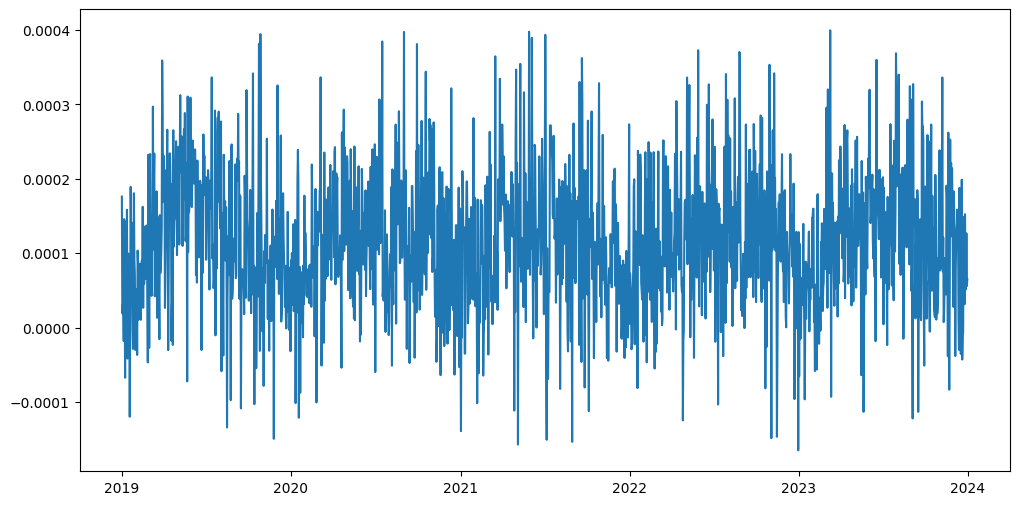

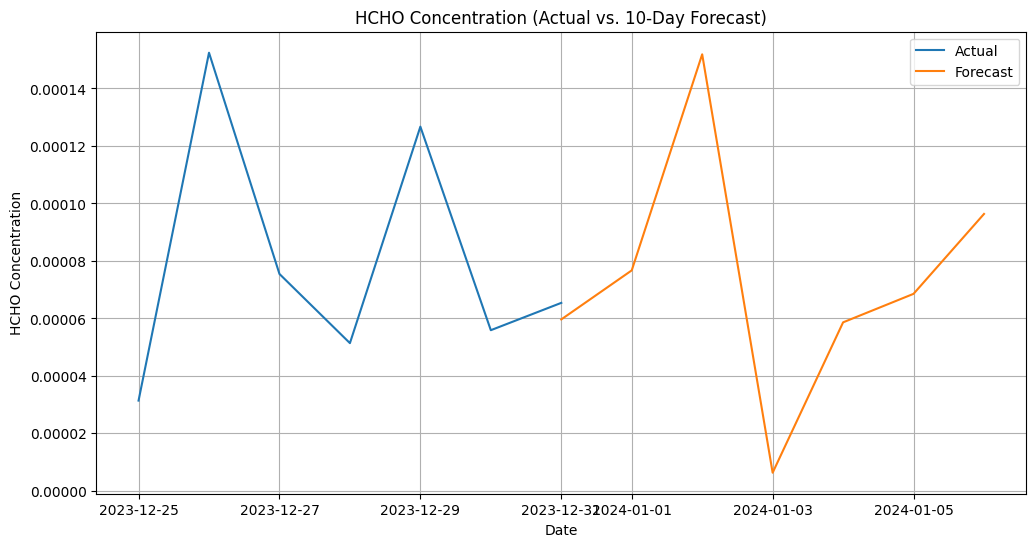

Mean Squared Error (MSE): 2.8800271499753988e-09
Root Mean Squared Error (RMSE): 5.3665884414359546e-05
Mean Absolute Error (MAE): 4.8167514456620094e-05


In [578]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
  # Perform Dickey-Fuller test
  dftest = adfuller(timeseries)
  dfvalue = dftest[0]
  pvalue = dftest[1]
  # Print test results
  print("ADF Statistic:", dfvalue)
  print("p-Value:", pvalue)
  # Interpret test results (conventionally, p-Value < 0.05 indicates stationarity)
  if pvalue < 0.05:
    print("Time series is likely stationary.")
  else:
    print("Time series is likely non-stationary.")

test_stationarity(Bibile_Monaragala_df['HCHO'])

# Daily Bibile_Monaragala_df might not have seasonality, but inspect your Bibile_Monaragala_df for patterns
# Seasonality could be weekly, monthly, quarterly, or yearly depending on the Bibile_Monaragala_df

# Use all Bibile_Monaragala_df up to the forecast start date for training (2023-12-30)
train = Bibile_Monaragala_df.loc[:pd.to_datetime('2023-12-30')]  

# Define forecast horizon
future_steps = 7 # Forecast for 7 days

# Set the forecast start date (2023-12-30)
start_date = pd.to_datetime('2023-12-30')

# Filter Bibile_Monaragala_df for plotting actual values (2023-12-25 to 2023-12-31)
plot_actual_dates = pd.date_range(start=pd.to_datetime('2023-12-25'), end=('2023-12-31'))  # Include the last day (2023-12-31) for actual Bibile_Monaragala_df

# Generate forecast for the next 10 days
future_forecast = train  # Use all Bibile_Monaragala_df up to forecast start date for training
model = SARIMAX(future_forecast['HCHO'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7),  # Adjust seasonality if needed
                 initialization='diffuse')
model_fit = model.fit()
forecast = model_fit.forecast(steps=future_steps)

# Prepare forecast dates
forecast_dates = pd.date_range(start=start_date+pd.Timedelta(days=1), periods=future_steps)  # Start forecast from next day


# View Bibile_Monaragala_df to identify potential seasonality (e.g., daily plots)
plt.figure(figsize=(12, 6))
plt.plot(Bibile_Monaragala_df['HCHO'])
plt.show()



# Plot actual Bibile_Monaragala_df and forecast
plt.figure(figsize=(12, 6))
plt.plot(plot_actual_dates, Bibile_Monaragala_df.loc[plot_actual_dates, 'HCHO'], label='Actual')
plt.plot(forecast_dates, forecast, label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('HCHO Concentration')
plt.title('HCHO Concentration (Actual vs. 10-Day Forecast)')
plt.grid(True)
plt.show()


# Calculate errors, MSE, RMSE, MAE
actual_values = Bibile_Monaragala_df.loc[plot_actual_dates, 'HCHO'].values
forecast_values = forecast.values
errors = actual_values - forecast_values
mse = np.mean(errors**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(errors))
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Kurunegala

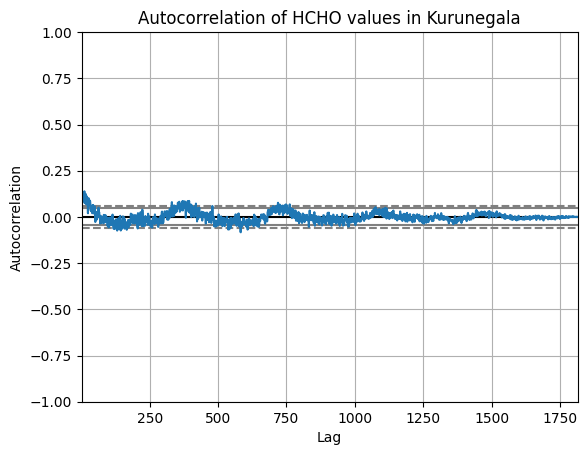

In [579]:
autocorrelation_plot(Kurunegala_Proper_df['HCHO'])
plt.title('Autocorrelation of HCHO values in Kurunegala')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

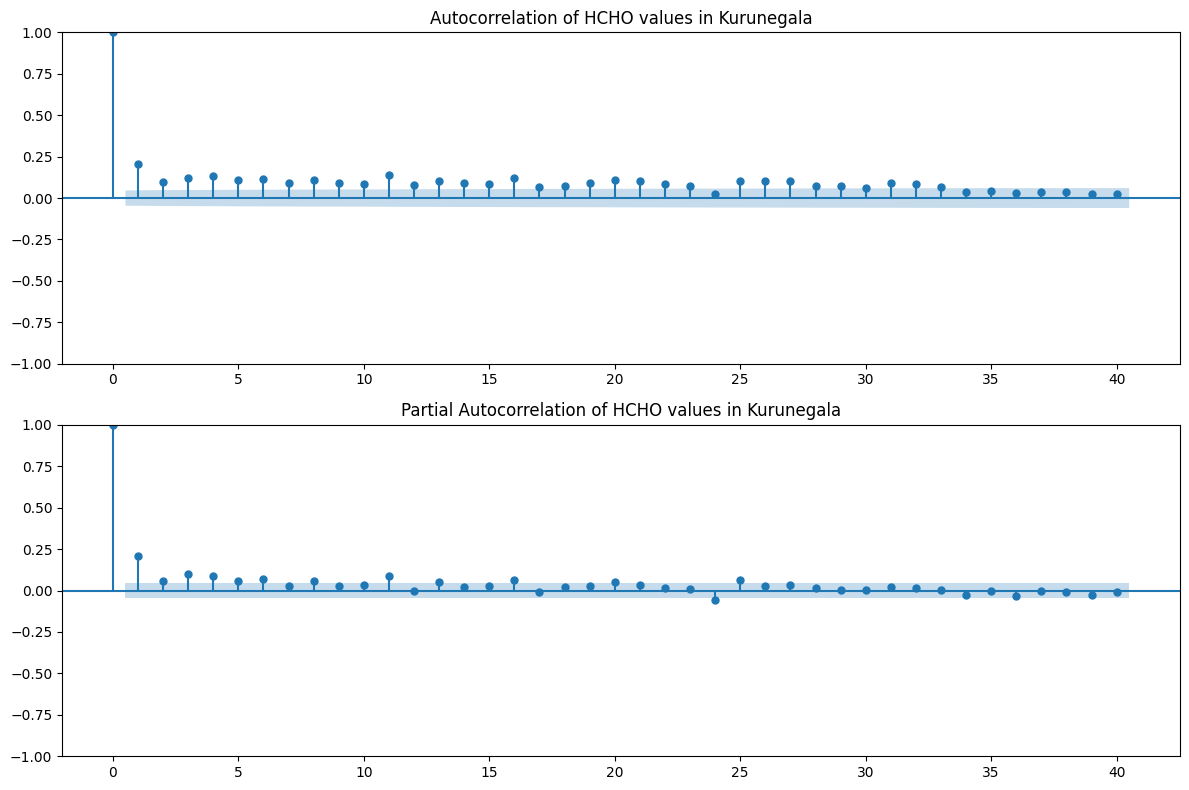

In [580]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Kurunegala_Proper_df['HCHO'].iloc[13:], lags=40, ax=ax1)
ax1.set_title('Autocorrelation of HCHO values in Kurunegala')

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Kurunegala_Proper_df['HCHO'].iloc[13:], lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation of HCHO values in Kurunegala')

plt.tight_layout()
plt.show()

ADF Statistic: -4.933104046572896
p-Value: 3.0053072666154762e-05
Time series is likely stationary.


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

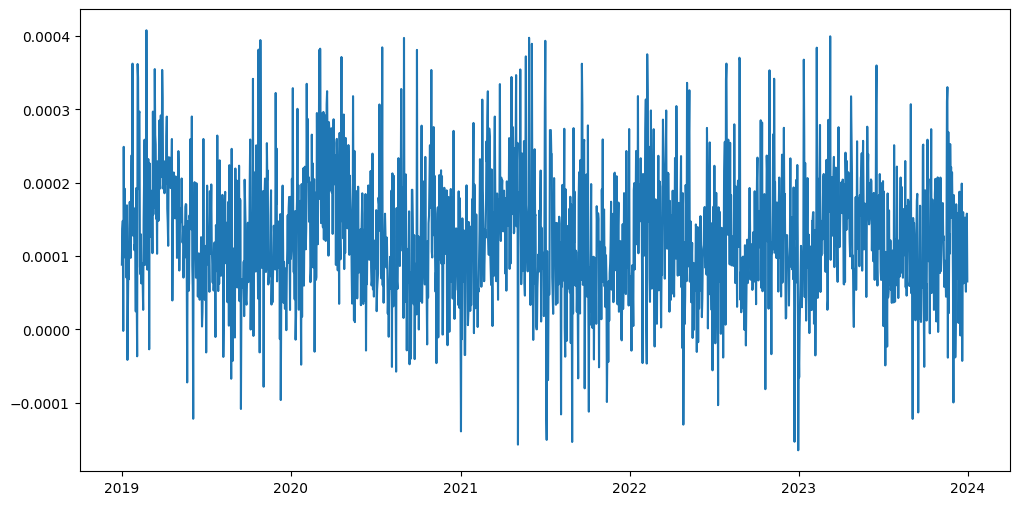

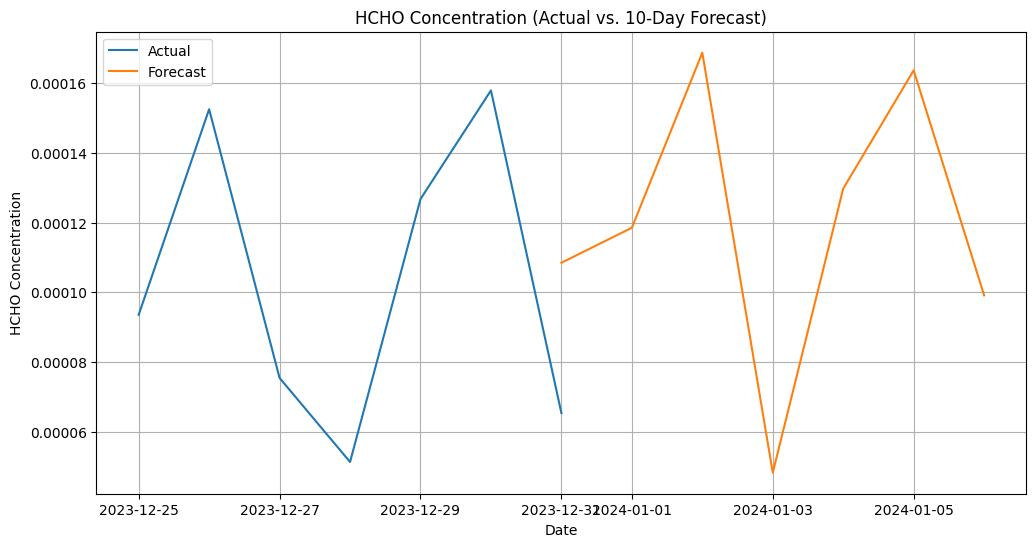

Mean Squared Error (MSE): 1.6064544491003382e-09
Root Mean Squared Error (RMSE): 4.008059941044218e-05
Mean Absolute Error (MAE): 2.6797392391196004e-05


In [581]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
  # Perform Dickey-Fuller test
  dftest = adfuller(timeseries)
  dfvalue = dftest[0]
  pvalue = dftest[1]
  # Print test results
  print("ADF Statistic:", dfvalue)
  print("p-Value:", pvalue)
  # Interpret test results (conventionally, p-Value < 0.05 indicates stationarity)
  if pvalue < 0.05:
    print("Time series is likely stationary.")
  else:
    print("Time series is likely non-stationary.")

test_stationarity(Kurunegala_Proper_df['HCHO'])

# Daily Kurunegala_Proper_df might not have seasonality, but inspect your Kurunegala_Proper_df for patterns
# Seasonality could be weekly, monthly, quarterly, or yearly depending on the Kurunegala_Proper_df

# Use all Kurunegala_Proper_df up to the forecast start date for training (2023-12-30)
train = Kurunegala_Proper_df.loc[:pd.to_datetime('2023-12-30')]  

# Define forecast horizon
future_steps = 7  # Forecast for 7 days

# Set the forecast start date (2023-12-30)
start_date = pd.to_datetime('2023-12-30')

# Filter Kurunegala_Proper_df for plotting actual values (2023-12-25 to 2023-12-31)
plot_actual_dates = pd.date_range(start=pd.to_datetime('2023-12-25'), end=('2023-12-31'))  # Include the last day (2023-12-31) for actual Kurunegala_Proper_df

# Generate forecast for the next 10 days
future_forecast = train  # Use all Kurunegala_Proper_df up to forecast start date for training
model = SARIMAX(future_forecast['HCHO'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7),  # Adjust seasonality if needed
                 initialization='diffuse')
model_fit = model.fit()
forecast = model_fit.forecast(steps=future_steps)

# Prepare forecast dates
forecast_dates = pd.date_range(start=start_date+pd.Timedelta(days=1), periods=future_steps)  # Start forecast from next day


# View Kurunegala_Proper_df to identify potential seasonality (e.g., daily plots)
plt.figure(figsize=(12, 6))
plt.plot(Kurunegala_Proper_df['HCHO'])
plt.show()



# Plot actual Kurunegala_Proper_df and forecast
plt.figure(figsize=(12, 6))
plt.plot(plot_actual_dates, Kurunegala_Proper_df.loc[plot_actual_dates, 'HCHO'], label='Actual')
plt.plot(forecast_dates, forecast, label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('HCHO Concentration')
plt.title('HCHO Concentration (Actual vs. 10-Day Forecast)')
plt.grid(True)
plt.show()

# Calculate errors, MSE, RMSE, MAE
actual_values = Kurunegala_Proper_df.loc[plot_actual_dates, 'HCHO'].values
forecast_values = forecast.values
errors = actual_values - forecast_values
mse = np.mean(errors**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(errors))
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Jaffna

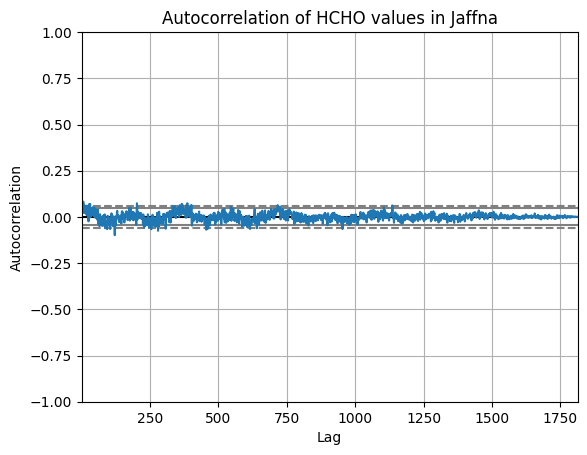

In [582]:
autocorrelation_plot(Jaffna_Proper_df['HCHO'])
plt.title('Autocorrelation of HCHO values in Jaffna')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

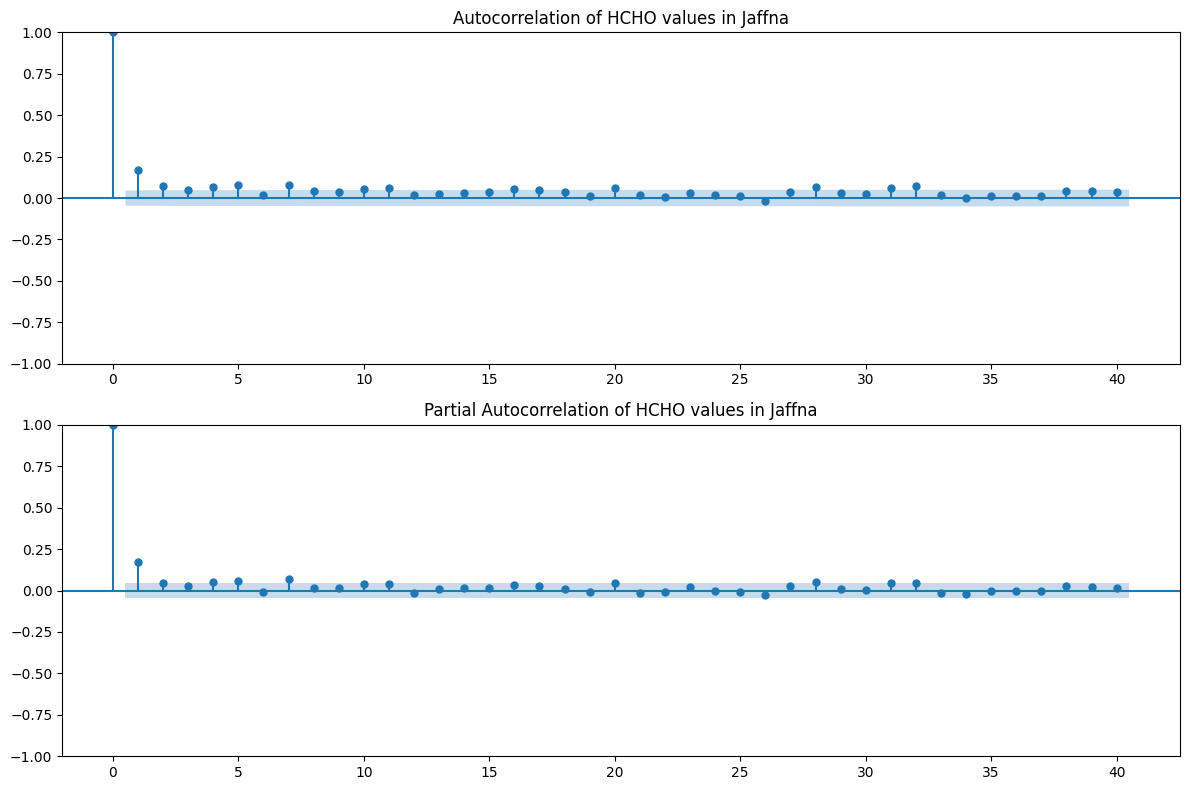

In [583]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Jaffna_Proper_df['HCHO'].iloc[13:], lags=40, ax=ax1)
ax1.set_title('Autocorrelation of HCHO values in Jaffna')

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Jaffna_Proper_df['HCHO'].iloc[13:], lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation of HCHO values in Jaffna')

plt.tight_layout()
plt.show()

ADF Statistic: -13.069312470096062
p-Value: 1.972151559825189e-24
Time series is likely stationary.


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

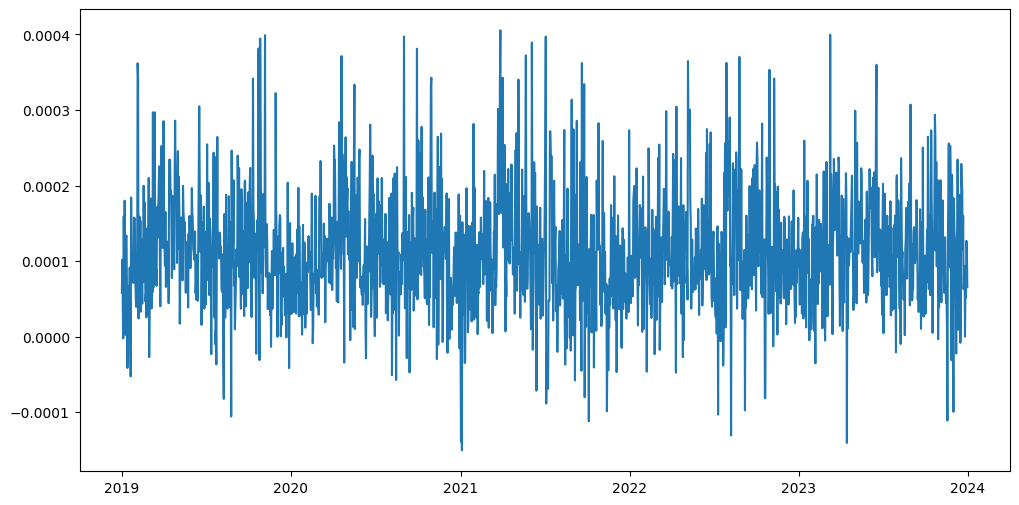

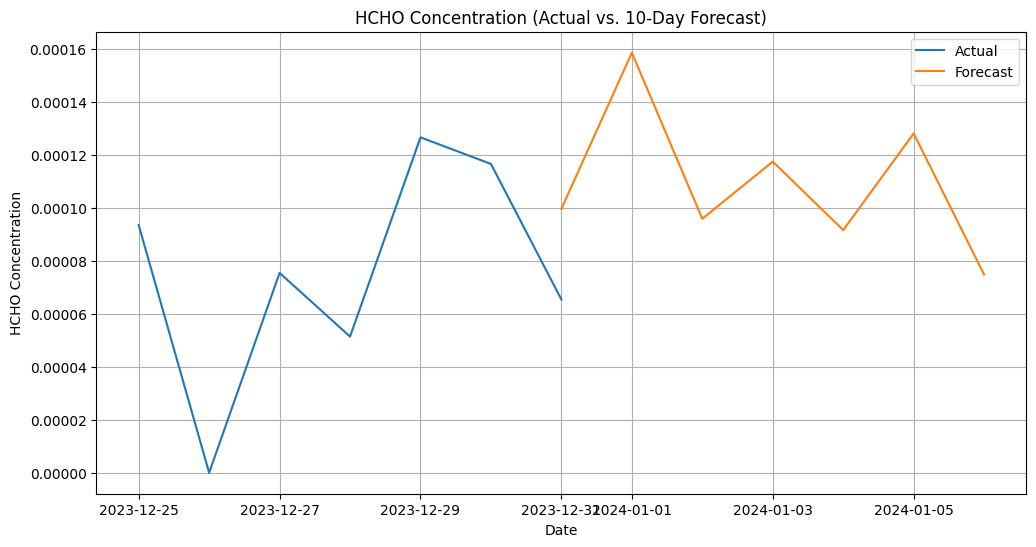

Mean Squared Error (MSE): 4.5001153499793454e-09
Root Mean Squared Error (RMSE): 6.708289908746749e-05
Mean Absolute Error (MAE): 4.394200922316337e-05


In [584]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
  # Perform Dickey-Fuller test
  dftest = adfuller(timeseries)
  dfvalue = dftest[0]
  pvalue = dftest[1]
  # Print test results
  print("ADF Statistic:", dfvalue)
  print("p-Value:", pvalue)
  # Interpret test results (conventionally, p-Value < 0.05 indicates stationarity)
  if pvalue < 0.05:
    print("Time series is likely stationary.")
  else:
    print("Time series is likely non-stationary.")

test_stationarity(Jaffna_Proper_df['HCHO'])

# Daily Jaffna_Proper_df might not have seasonality, but inspect your Jaffna_Proper_df for patterns
# Seasonality could be weekly, monthly, quarterly, or yearly depending on the Jaffna_Proper_df

# Use all Jaffna_Proper_df up to the forecast start date for training (2023-12-30)
train = Jaffna_Proper_df.loc[:pd.to_datetime('2023-12-30')]  

# Define forecast horizon
future_steps = 7 # Forecast for 7 days

# Set the forecast start date (2023-12-30)
start_date = pd.to_datetime('2023-12-30')

# Filter Jaffna_Proper_df for plotting actual values (2023-12-25 to 2023-12-31)
plot_actual_dates = pd.date_range(start=pd.to_datetime('2023-12-25'), end=('2023-12-31'))  # Include the last day (2023-12-31) for actual Jaffna_Proper_df

# Generate forecast for the next 10 days
future_forecast = train  # Use all Jaffna_Proper_df up to forecast start date for training
model = SARIMAX(future_forecast['HCHO'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7),  # Adjust seasonality if needed
                 initialization='diffuse')
model_fit = model.fit()
forecast = model_fit.forecast(steps=future_steps)

# Prepare forecast dates
forecast_dates = pd.date_range(start=start_date+pd.Timedelta(days=1), periods=future_steps)  # Start forecast from next day


# View Jaffna_Proper_df to identify potential seasonality (e.g., daily plots)
plt.figure(figsize=(12, 6))
plt.plot(Jaffna_Proper_df['HCHO'])
plt.show()



# Plot actual Jaffna_Proper_df and forecast
plt.figure(figsize=(12, 6))
plt.plot(plot_actual_dates, Jaffna_Proper_df.loc[plot_actual_dates, 'HCHO'], label='Actual')
plt.plot(forecast_dates, forecast, label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('HCHO Concentration')
plt.title('HCHO Concentration (Actual vs. 10-Day Forecast)')
plt.grid(True)
plt.show()


# Calculate errors, MSE, RMSE, MAE
actual_values = Jaffna_Proper_df.loc[plot_actual_dates, 'HCHO'].values
forecast_values = forecast.values
errors = actual_values - forecast_values
mse = np.mean(errors**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(errors))
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)